# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Plotting-in-Julia" data-toc-modified-id="Plotting-in-Julia-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting in Julia</a></div><div class="lev2 toc-item"><a href="#Gadfly.jl" data-toc-modified-id="Gadfly.jl-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gadfly.jl</a></div><div class="lev2 toc-item"><a href="#Plots.jl" data-toc-modified-id="Plots.jl-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plots.jl</a></div>

# Plotting in Julia

The three most popular options (as far as I know) in Julia are

- [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)
    - Julia equivalent of `ggplot2` in R
    
    
- [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl)
    - Wrapper for Python's matplotlib
    
    
- [Plots.jl](https://github.com/JuliaPlots/Plots.jl)
    - Defines an unified interface for plotting
    - maps arguments to different plotting "backends"
        - PyPlot, GR, PlotlyJS, and many more  
    - For a complete list of backends: <http://docs.juliaplots.org/latest/backends/>  
    - Mapping of attributes to backends: <http://docs.juliaplots.org/latest/supported/>  
    - First runs can be slowish. I found the GR backend fastest and most stable.

## Gadfly.jl

To demonstrate Gadfly, we will go through an example and compare it to ggplot2. 

In [1]:
#Pkg.add("Gadfly")

┌ Warning: RCall.jl: 
│ Attaching package: ‘dplyr’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     filter, lag
│ 
│ The following objects are masked from ‘package:base’:
│ 
│     intersect, setdiff, setequal, union
│ 
└ @ RCall /Users/huazhou/.julia/packages/RCall/ffM0W/src/io.jl:113


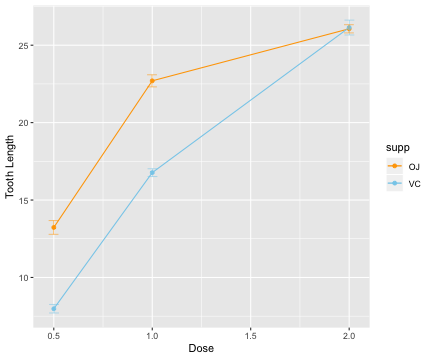

RObject{VecSxp}


In [2]:
using RCall

R"""
library(ggplot2)
library(dplyr)

df <- ToothGrowth %>%
  group_by(supp, dose) %>%
  summarise(se = sd(len) / n(), len = mean(len), n = n())

ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5,
  position = position_dodge(0.005)) +  
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length") 
"""

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/huazhou/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


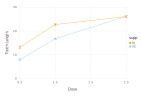

In [3]:
@rget df # retrieve dataframe from R to Julia workspace
using Gadfly
df[:ymin] = df[:len] - df[:se]
df[:ymax] = df[:len] + df[:se]
Gadfly.plot(df, x = :dose, y = :len, color = :supp, Geom.point,
    Guide.xlabel("Dose"), Guide.ylabel("Tooth Length"), 
    Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
    Geom.line, Geom.errorbar, ymin = :ymin, ymax = :ymax, 
    Scale.color_discrete_manual("orange", "skyblue"))

Both offer more customized options

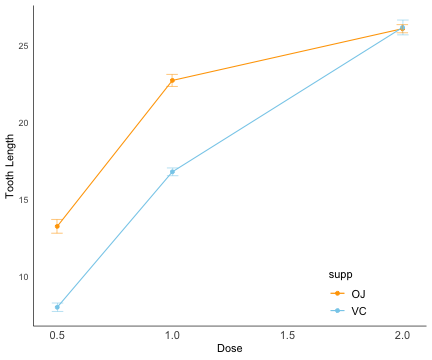

RObject{VecSxp}


In [4]:
R"""
ggplot(df, aes(x = dose, y = len, group = supp, color = supp)) + 
  geom_line() +
  geom_point() +
  geom_errorbar(aes(ymin = len - se, ymax = len + se), width = 0.1, alpha = 0.5, 
    position = position_dodge(0.005)) + 
    theme(legend.position = c(0.8,0.1), 
    legend.key = element_blank(), 
    axis.text.x = element_text(angle = 0, size = 11), 
    axis.ticks = element_blank(), 
    panel.grid.major = element_blank(), 
    legend.text=element_text(size = 11),
    panel.border = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), 
    axis.line = element_line(color = 'black',size = 0.3), 
  plot.title = element_text(hjust = 0.5)) + 
  scale_color_manual(values = c(VC = "skyblue", OJ = "orange")) + 
  labs(x = "Dose", y = "Tooth Length")
"""

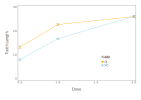

In [5]:
Gadfly.plot(df, x = :dose, y = :len, color = :supp, Geom.point,
    Guide.xlabel("Dose"), Guide.ylabel("Tooth Length"), 
    Guide.xticks(ticks = [0.5, 1.0, 1.5, 2.0]),
    Theme(panel_fill = nothing, highlight_width = 0mm, point_size = 0.5mm,
    key_position = :inside, 
    grid_line_width = 0mm, panel_stroke = colorant"black"),
    Geom.line, Geom.errorbar, ymin = :ymin, ymax = :ymax, 
    Scale.color_discrete_manual("orange", "skyblue"))

## Plots.jl

We demonstrate Plots.jl below:

In [6]:
# Pkg.add("Plots")
using Plots, Random

Random.seed!(123) # set seed
x = cumsum(randn(50, 2), dims=1);

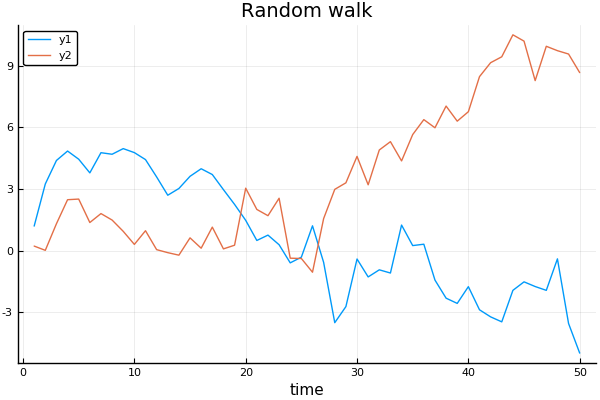

In [7]:
# Pkg.add("PyPlot")
pyplot()  # set the backend to PyPlot
Plots.plot(x, title="Random walk", xlab="time")

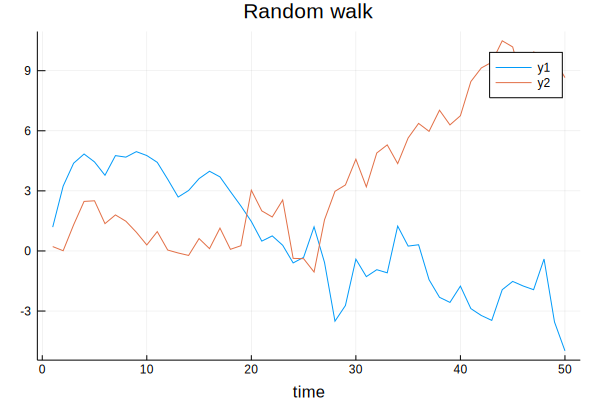

In [8]:
gr()   # change backend to GR
Plots.plot(x, title="Random walk", xlab="time")

In [9]:
gr()
@gif for i in 1:20
    Plots.plot(x -> sin(x) / (.2i), 0, i, xlim=(0, 20), ylim=(-.75, .75))
    scatter!(x -> cos(x) * .01 * i, 0, i, m=1)
end;

┌ Info: Saved animation to 
│   fn = /Users/huazhou/Documents/github.com/Hua-Zhou.github.io/teaching/biostatm280-2019spring/slides/02-juliaintro/tmp.gif
└ @ Plots /Users/huazhou/.julia/packages/Plots/47Tik/src/animation.jl:90


<img src="./tmp.gif" />

In [10]:
# Pkg.add("PlotlyJS")
plotlyjs()  # change backend to PlotlyJS
Plots.plot(x, title="Random walk", xlab="time")

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/130ff73e92ede360441623722ae524c752cfa7d6-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/130ff73e92ede360441623722ae524c752cfa7d6-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

WebIO.mount(this.previousSibling,{"props":{},"nodeType":"Scope","type":"node","instanceArgs":{"imports":{"data":[{"name":"Plotly","type":"js","url":"/assetserver/254d18be3060c7678300f7ba778b44e52eb1c2e4-plotly-latest.min.js"},{"name":null,"type":"js","url":"/assetserver/ec4c921409aae37821fb5130ffdd595a83896c76-plotly_webio.bundle.js"}],"type":"async_block"},"id":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","handlers":{"_toImage":[(function (options){return this.Plotly.toImage(this.plotElem,options).then((function (data){return WebIO.setval({"name":"image","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_05","type":"observable"},data)}))})],"__get_gd_contents":[(function (prop){prop=="data" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_06","type":"observable"},this.plotElem.data)) : undefined; return prop=="layout" ? (WebIO.setval({"name":"__gd_contents","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_06","type":"observable"},this.plotElem.layout)) : undefined})],"_promises":{"importsLoaded":[(function (Plotly){var gd=this.dom.querySelector("#plot-fd828b8d-5fbc-467a-9bec-ea71ee875281"); this.plotElem=gd; this.Plotly=Plotly; (window.Blink!==undefined) ? (gd.style.width="100%", gd.style.height="100vh", gd.style.marginLeft="0%", gd.style.marginTop="0vh") : undefined; window.onresize=(function (){return Plotly.Plots.resize(gd)}); Plotly.newPlot(gd,[],{"margin":{"l":50,"b":50,"r":50,"t":60}},{}); gd.on("plotly_hover",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"hover"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"hover","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_01","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_unhover",(function (){return WebIO.setval({"name":"hover","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_01","type":"observable"},{})})); gd.on("plotly_selected",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"selected"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"selected","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_02","type":"observable"},filtered_data.out)) : undefined})); gd.on("plotly_deselect",(function (){return WebIO.setval({"name":"selected","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_02","type":"observable"},{})})); gd.on("plotly_relayout",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"relayout"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"relayout","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_04","type":"observable"},filtered_data.out)) : undefined})); return gd.on("plotly_click",(function (data){var filtered_data=WebIO.PlotlyCommands.filterEventData(gd,data,"click"); return !(filtered_data.isnil) ? (WebIO.setval({"name":"click","scope":"scope-5fc4d5e2-88f0-4840-9353-8ff9c80d1bca","id":"ob_03","type":"observable"},filtered_data.out)) : undefined}))})]},"_downloadImage":[(function (options){return this.Plotly.downloadImage(this.plotElem,options)})],"_commands":[(function (args){var fn=args.shift(); var elem=this.plotElem; var Plotly=this.Plotly; args.unshift(elem); return Plotly[fn].apply(this,args)})]},"systemjs_options":null,"observables":{"_toImage":{"sync":false,"id":"ob_08","value":{}},"hover":{"sync":false,"id":"ob_01","value":{}},"selected":{"sync":false,"id":"ob_02","value":{}},"__gd_contents":{"sync":false,"id":"ob_06","value":{}},"click":{"sync":false,"id":"ob_03","value":{}},"image":{"sync":true,"id":"ob_05","value":""},"__get_gd_contents":{"sync":false,"id":"ob_10","value":""},"_downloadImage":{"sync":false,"id":"ob_09","value":{}},"relayout":{"sync":false,"id":"ob_04","value":{}},"_commands":{"sync":false,"id":"ob_07","value":["relayout",{"showlegend":true,"xaxis":{"showticklabels":true,"gridwidth":0.5,"tickvals":[0.0,10.0,20.0,30.0,40.0,50.0],"visible":true,"ticks":"inside",